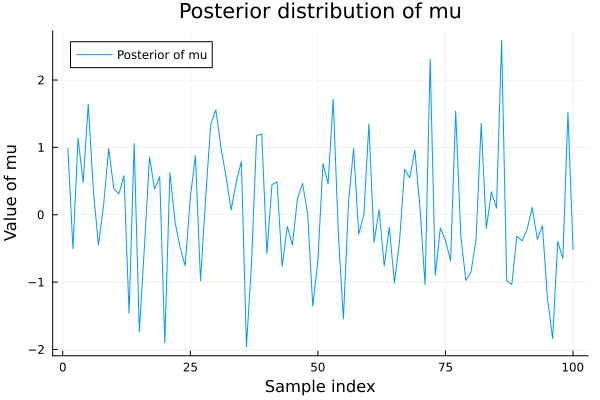

In [1]:
using Gen
using Plots

# Define the model with dynamic eta sampling
@gen function simple_normal_model(sigma, obs_data)
    mu ~ normal(0, 1)     # Sample mu from a normal distribution
    tau = abs(@trace(cauchy(0,25), :tau))  # Sample tau from a Half-Cauchy distribution
    
    # Dynamic eta values sampled from normal distributions
    list_of_Eta = [{(:eta, i)} ~ normal(0, 1) for i=1:5]
    
    for i in 1:5  # Loop over 5 iterations
        # Calculate theta based on mu, tau, and eta
        theta = mu + tau * list_of_Eta[i]
        
        # Sample obs from a normal distribution with mean theta and standard deviation sigma[i]
        {(:obs, i)} ~ normal(theta, sigma[i])
    end
    
    
end

# Define the sigma array (standard deviations for each observation)
sigma = [15, 10, 16, 11, 9]

# Assume some observed data (these would be your real observations)
obs_data = [10.1, 9.8, 11.5, 8.9, 10.4]  # Example data

# Run inference using Gen's importance sampling or MCMC methods
# We use a generative model to specify the likelihood and observed data

# We want to infer mu and tau (you can infer more parameters if needed)
# Inference via MCMC sampling or importance sampling

# Use importance sampling as an example:
traces = [simulate(simple_normal_model, (sigma, obs_data)) for _ in 1:100]  # Run 100 importance samples

# Extract mu values from the traces
mu_values = [trace[:mu] for trace in traces]

# Plot the posterior distribution of mu
plot(mu_values, label="Posterior of mu", xlabel="Sample index", ylabel="Value of mu", title="Posterior distribution of mu")
